In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from PIL import Image

Reading Dataset using pandas

In [2]:
#Dataset Source - https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
dataset = pd.read_csv('personality_dataset.csv')

Checking Null Values and Fixing It

In [3]:
print(dataset.isnull().sum())

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [4]:
dataset

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [5]:
dataset['Stage_fear'] = dataset['Stage_fear'].fillna(dataset['Stage_fear'].mode()[0])
dataset['Drained_after_socializing'] = dataset['Drained_after_socializing'].fillna(dataset['Drained_after_socializing'].mode()[0])

dataset['Time_spent_Alone'] = dataset['Time_spent_Alone'].fillna(dataset['Time_spent_Alone'].mean())
dataset['Social_event_attendance'] = dataset['Social_event_attendance'].fillna(dataset['Social_event_attendance'].mean())
dataset['Going_outside'] = dataset['Going_outside'].fillna(dataset['Going_outside'].mean())
dataset['Friends_circle_size'] = dataset['Friends_circle_size'].fillna(dataset['Friends_circle_size'].mean())
dataset['Post_frequency'] = dataset['Post_frequency'].fillna(dataset['Post_frequency'].mean())

In [6]:
print(dataset.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [7]:
dataset['Stage_fear'] = (dataset['Stage_fear'] == 'Yes').astype('int32')
dataset['Drained_after_socializing'] = (dataset['Drained_after_socializing'] == 'Yes').astype('int32')
dataset['Personality'] = (dataset['Personality'] == 'Extrovert').astype('int32')

Personality Equality Check (1.0 - Extrovert & 0.0 - Introvert)

In [8]:
dataset['Personality'].value_counts()

Personality
1    1491
0    1409
Name: count, dtype: int64

In [9]:
dataset

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0
2898,11.0,1,1.0,3.0,1,2.0,0.0,0


Converting All Columns to float

In [10]:
for i,j in zip(dataset.columns,dataset.dtypes):
    dataset[i] = dataset[i].astype('float64')

In [11]:
dataset = dataset.round(2)

In [12]:
dataset

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1.0
...,...,...,...,...,...,...,...,...
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1.0
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1.0
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0
2898,11.0,1.0,1.0,3.0,1.0,2.0,0.0,0.0


Shuffling Dataset to avoid pattern recognition

In [13]:
np.random.seed(42)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [14]:
dataset

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,10.00,1.0,3.00,3.0,1.0,5.0,3.0,0.0
1,4.51,0.0,3.96,5.0,0.0,14.0,5.0,1.0
2,5.00,1.0,0.00,0.0,1.0,0.0,2.0,0.0
3,10.00,1.0,2.00,2.0,1.0,2.0,1.0,0.0
4,7.00,1.0,0.00,0.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2895,2.00,0.0,7.00,4.0,0.0,12.0,8.0,1.0
2896,0.00,0.0,7.00,4.0,0.0,14.0,6.0,1.0
2897,11.00,1.0,1.00,1.0,1.0,4.0,2.0,0.0
2898,10.00,1.0,3.00,1.0,1.0,5.0,0.0,0.0


Spliting Feature and Label

In [15]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Spliting Train and Test Dataset

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
models = [
    ('Logistic Regression', {'max_iter': 1000},LogisticRegression()),
    ('Random Forest', {'n_estimators': 100, 'random_state': 42},RandomForestClassifier()),
    ('Support Vector Machine', {'kernel': 'linear'},SVC()),
    ('XGBoost', {'objective': 'binary:logistic', 'eval_metric': 'logloss'},XGBClassifier())
]

In [19]:
reports = []
for name, params, model in models:
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    reports.append({
        'Model': name,
        'Accuracy': accuracy,
        'Confusion Matrix': cm,
        'Classification Report': report
    })

Signature Definition for MLFlow

In [20]:
from mlflow.models import ModelSignature
from mlflow.types import DataType, Schema, ColSpec

input_schema = Schema([ColSpec(DataType.double, "Time_spent_Alone"), ColSpec(DataType.double, "Stage_fear"), ColSpec(DataType.double, "Social_event_attendance"), ColSpec(DataType.double, "Going_outside"), ColSpec(DataType.double, "Drained_after_socializing"), ColSpec(DataType.double, "Friends_circle_size"), ColSpec(DataType.double, "Post_frequency")])
output_schema = Schema([ColSpec(DataType.double, "Personality")])

signature = ModelSignature(inputs=input_schema, outputs=output_schema)

Registering Hyper Parameter and Metric to Experiment in MLFlow

In [27]:
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from mlflow.models import infer_signature


mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("PersonalityPrediction")

for i, element in enumerate(models):
    model_name = element[0]
    params = element[1]
    model = element[2]
    report = reports[i]

    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(params)
        mlflow.log_metric("accuracy", report['Accuracy'])
        mlflow.log_metric("precision_class_0", report['Classification Report']['0.0']['precision'])
        mlflow.log_metric("precision_class_1", report['Classification Report']['1.0']['precision'])
        mlflow.log_metric("recall_class_0", report['Classification Report']['0.0']['recall'])
        mlflow.log_metric("recall_class_1", report['Classification Report']['1.0']['recall'])
        mlflow.log_metric("f1-score_class_0", report['Classification Report']['0.0']['f1-score'])
        mlflow.log_metric("f1-score_class_1", report['Classification Report']['1.0']['f1-score'])
        print('run_id', mlflow.active_run().info.run_id)
        
        if model_name == 'XGBoost':
            mlflow.xgboost.log_model(model, "model", signature=signature)
        else:
            mlflow.sklearn.log_model(model, "model", signature=signature)
        
        print(f"Logged {model_name} model with accuracy: {report['Accuracy']}")


run_id 5756f11c8cee4e43876e7afdc4dc7e8e
Logged Logistic Regression model with accuracy: 0.9327586206896552
🏃 View run Logistic Regression at: http://localhost:5000/#/experiments/552660751206068934/runs/5756f11c8cee4e43876e7afdc4dc7e8e
🧪 View experiment at: http://localhost:5000/#/experiments/552660751206068934
run_id eb095bca4d0f451d8eb8e58646bcfac4
Logged Random Forest model with accuracy: 0.9241379310344827
🏃 View run Random Forest at: http://localhost:5000/#/experiments/552660751206068934/runs/eb095bca4d0f451d8eb8e58646bcfac4
🧪 View experiment at: http://localhost:5000/#/experiments/552660751206068934
run_id 49a551bd38824969a8fb2f03384c2e2d
Logged Support Vector Machine model with accuracy: 0.9344827586206896
🏃 View run Support Vector Machine at: http://localhost:5000/#/experiments/552660751206068934/runs/49a551bd38824969a8fb2f03384c2e2d
🧪 View experiment at: http://localhost:5000/#/experiments/552660751206068934
run_id b1c43bdbb9e846649871a85de82e10cd


C:\Users\yajith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\core.py:158: UserWarning: [22:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


Logged XGBoost model with accuracy: 0.9327586206896552
🏃 View run XGBoost at: http://localhost:5000/#/experiments/552660751206068934/runs/b1c43bdbb9e846649871a85de82e10cd
🧪 View experiment at: http://localhost:5000/#/experiments/552660751206068934


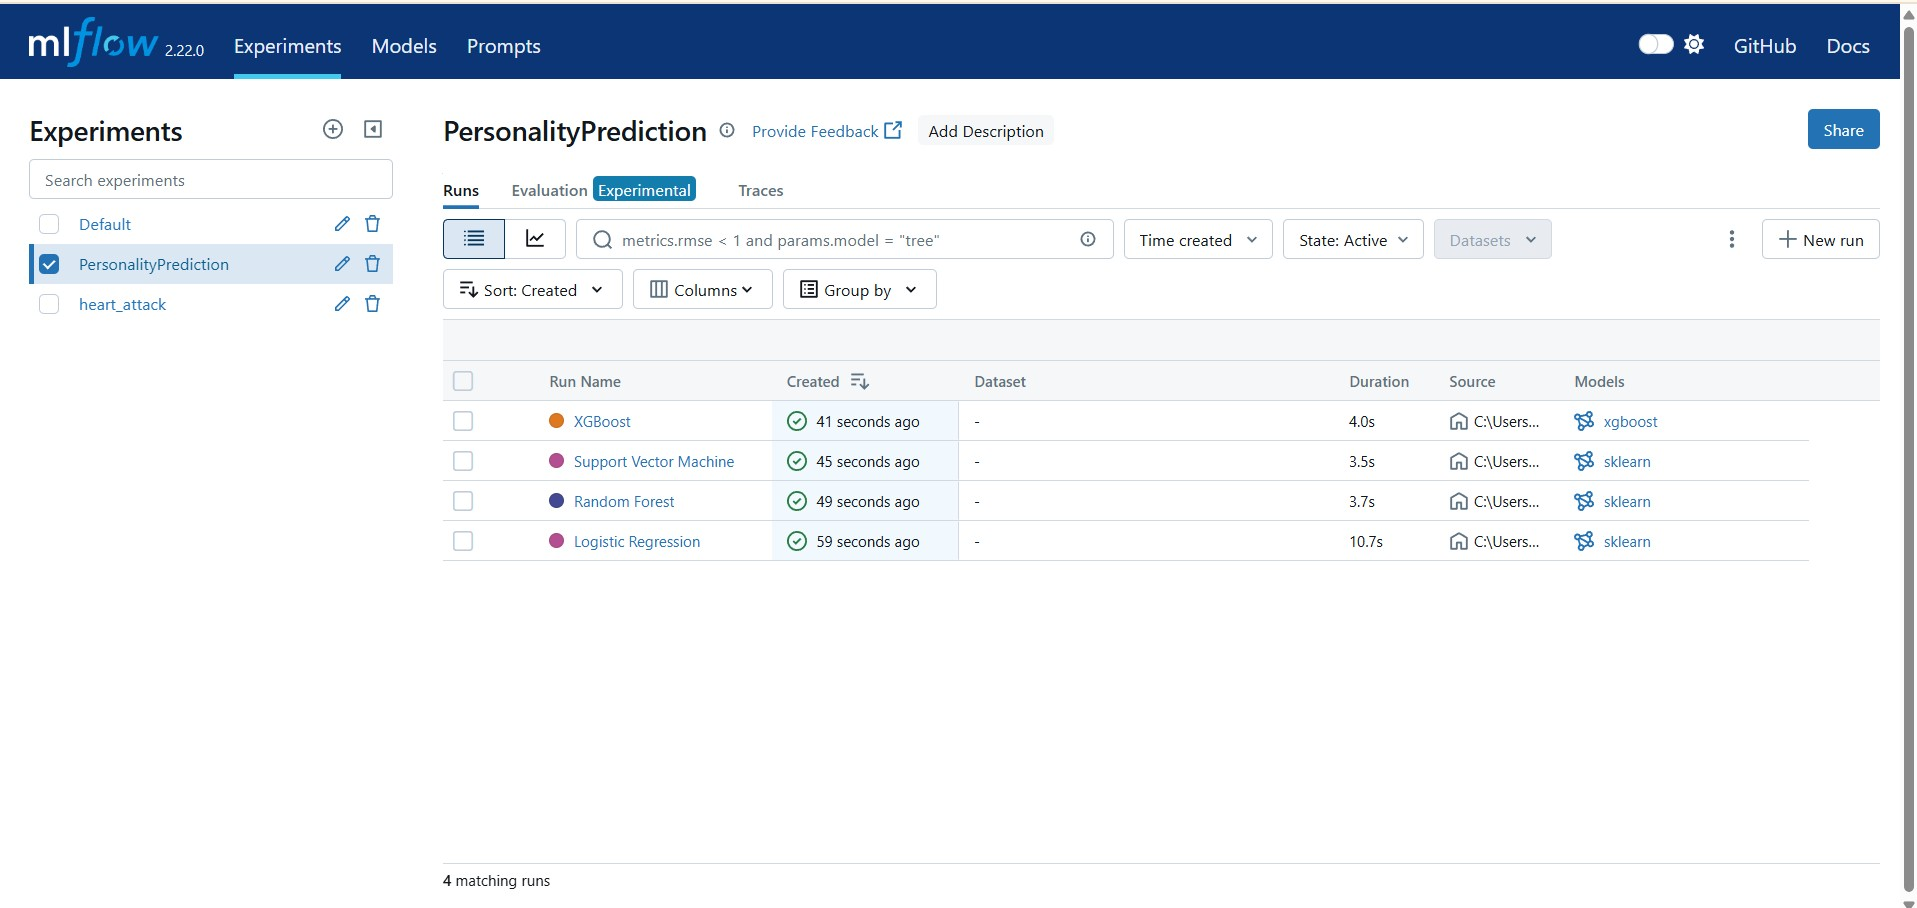

In [22]:
img = Image.open("Mlflow_run.jpg")
display(img)

In [33]:
run_id='b1c43bdbb9e846649871a85de82e10cd'
model_uri = f'runs:/{run_id}/model_name'

mlflow.register_model(model_uri=model_uri, name='PersonalityPredictionModel_XGBoost')

Registered model 'PersonalityPredictionModel_XGBoost' already exists. Creating a new version of this model...
2025/05/28 22:43:28 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: PersonalityPredictionModel_XGBoost, version 2
Created version '2' of model 'PersonalityPredictionModel_XGBoost'.


<ModelVersion: aliases=[], creation_timestamp=1748452408826, current_stage='None', description='', last_updated_timestamp=1748452408826, name='PersonalityPredictionModel_XGBoost', run_id='b1c43bdbb9e846649871a85de82e10cd', run_link='', source='mlflow-artifacts:/552660751206068934/b1c43bdbb9e846649871a85de82e10cd/artifacts/model_name', status='READY', status_message=None, tags={}, user_id='', version='2'>

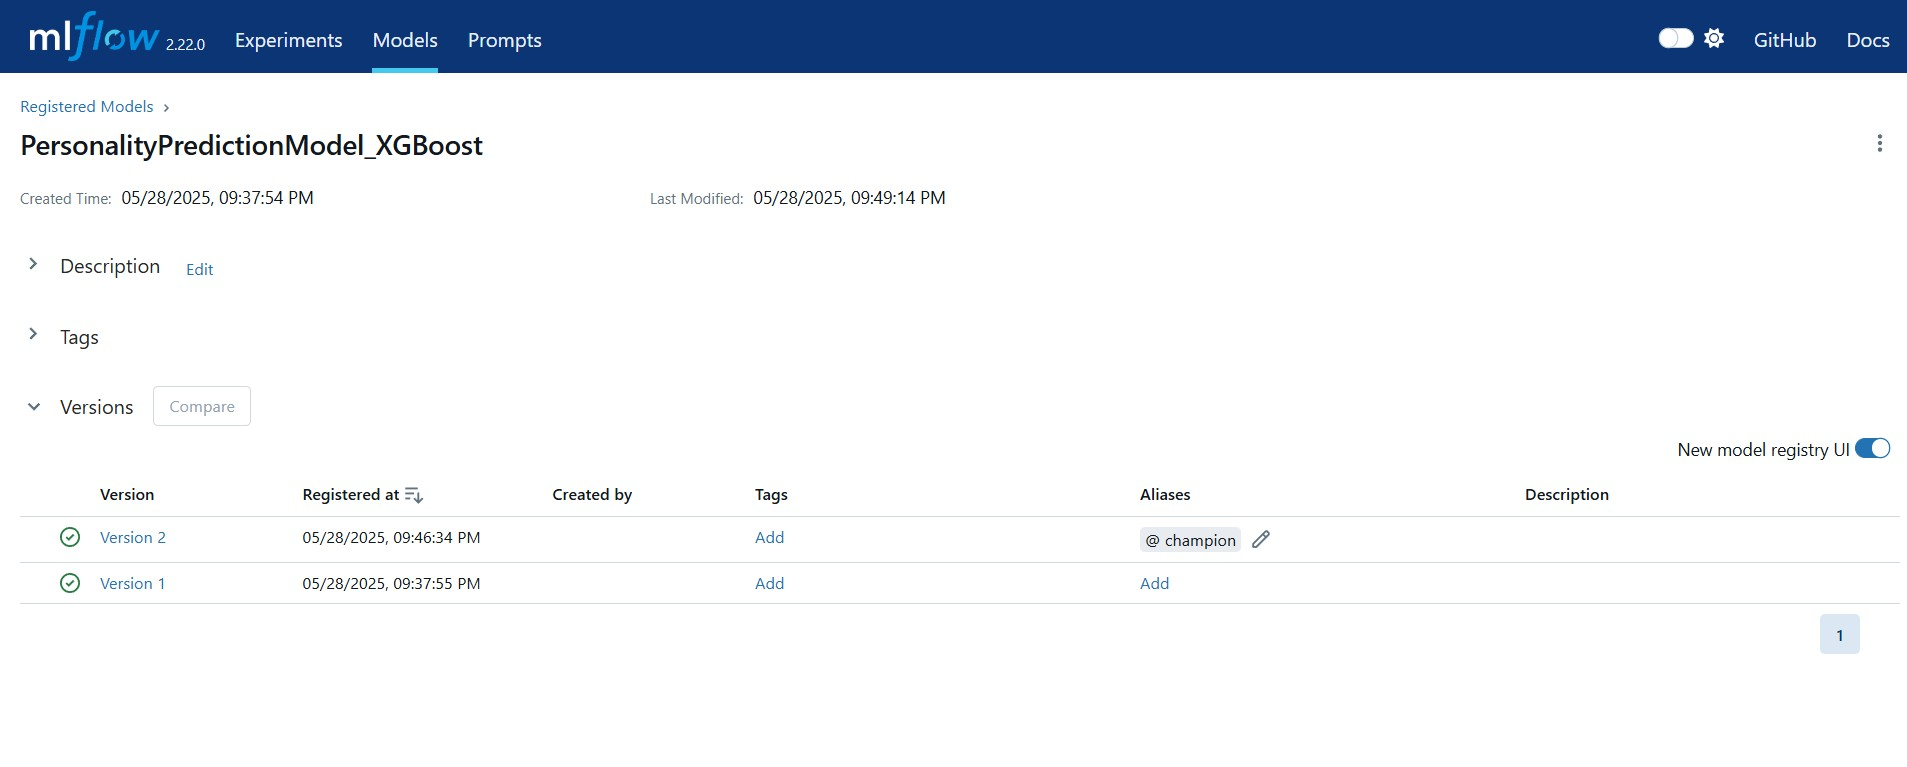

In [24]:
img = Image.open("MLFlow_model.jpg")
display(img)

Fetching Model from ML Flow and Testing using Test Dataset

In [34]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("PersonalityPrediction")

model_version = 3
model_name = 'PersonalityPredictionModel_XGBoost'
model_uri = f"models:/{model_name}/{model_version}"

loaded_model = mlflow.xgboost.load_model(model_uri)
y_pred = loaded_model.predict(X_test)
y_pred

C:\Users\yajith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,